<a href="https://colab.research.google.com/github/ttnok/c-programming-on-colab/blob/main/%E6%8E%88%E6%A5%AD%E8%B3%87%E6%96%99/C%E8%A8%80%E8%AA%9E%E6%BC%94%E7%BF%92%E7%AC%AC13%E5%9B%9E%E7%9B%AE2022_01_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

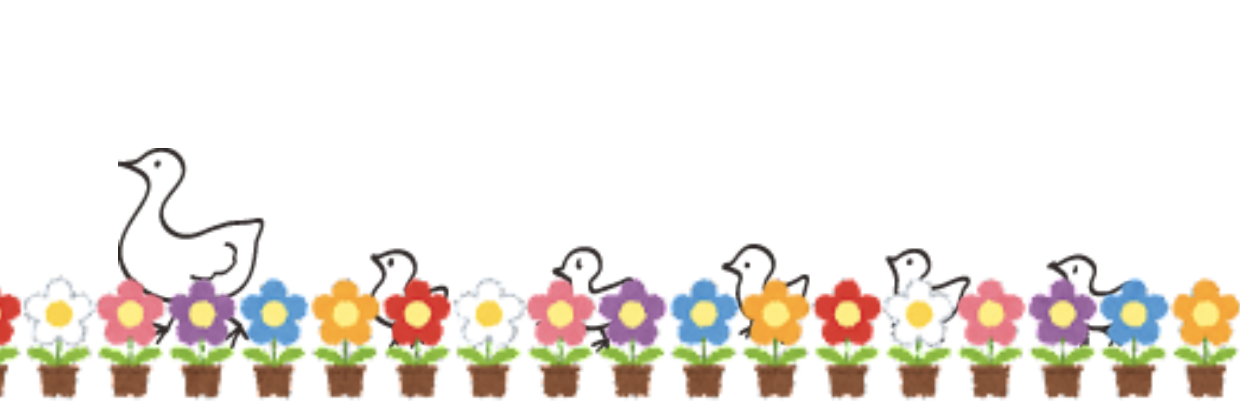


# C 言語演習 第 13 回
2022-01-11 M 科 C 組

**適宜テキストセルを追加して、自分用のメモを追加するとよいでしょう。**

※ このページへは Google Chrome か Microsoft Edge でアクセスしてください。
他のブラウザでも動作する場合がありますが、この授業ではサポートしません。

※ 「ドライブにコピー」を忘れずに。

※ 「Colab Notebooks」フォルダ確認： https://drive.google.com/


## 内容

* 今回はシラバス「到達目標(6)」に対応する「発展課題（配点10点）」の説明をします。
* 問題自体は別のノートブックに記述しています。classroomの「発展課題」からリンクしています。

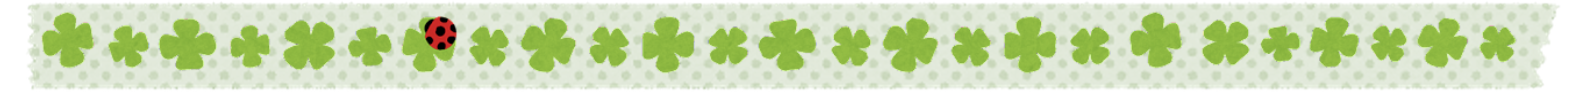

## 手順1 -- `svgplot.c` の作成

次のコードセルを実行して、`svgplot.c` というファイルを作成する（後のプログラムで include する）。

たしかにファイルが作成されていることを左のファイラー（フォルダアイコンをクリックするとファイル一覧が表示される）で、確認しておくこと。

In [ ]:
%%file svgplot.c
/**
 *   svgplot.c -- SVGグラフィックス
 *   
 *   * original は奥村晴彦『［改訂新版］C言語による標準アルゴリズム事典』のコード。
 *   * original のコードを一部改変。
 */
#include <stdio.h>
static double ymax;

void plot_start(int x, int y)  /* プロット開始 */
{
    printf("<svg xmlns=\"http://www.w3.org/2000/svg\" ");
    printf("version=\"1.1\" width=\"%d\" height=\"%d\">\n", x, y);
    printf("<path d=\"");
    ymax = y;
}

void plot_end(int close)  /* プロット終了 */
{
    if (close) printf("Z");
    printf("\" fill=\"none\" stroke=\"black\" />\n");
    printf("</svg>\n");
}

void move(double x, double y)  /* ペンアップで移動 */
{
    printf("M %g %g ", x, ymax - y);
}

void draw(double x, double y)  /* ペンダウンで移動 */
{
    printf("L %g %g ", x, ymax - y);
}




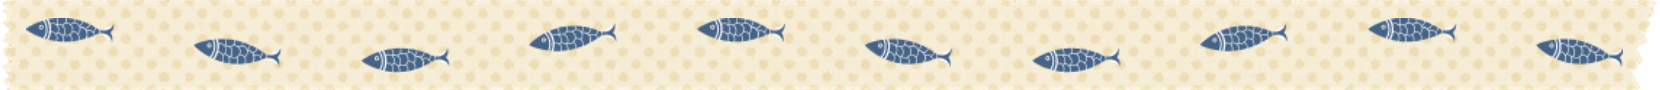

## 手順2 -- サンプルコード作成、実行、描画

以下のコードセル4つを順に実行して、コンパイルしてみよ。
四角形が表示されるはずである。

それぞれのセルの役割を理解しておくこと。


### (1) 描画プログラム、ソースコード

In [ ]:
%%file sample.c
#include "svgplot.c"

int main(void)
{
    // 描画開始。キャンバスの領域の大きさは 500x500 とする。
    plot_start(500, 500);

    // 下辺の描画。ペンを上げて (100, 100) に移動し、ペンを下ろして (400, 100) まで移動。
    move(100, 100);
    draw(400, 100);

    // 右辺の描画。ペンを下ろしたまま (400, 400) に移動。
    draw(400, 400);
 
    // 上辺の描画。ペンを下ろしたまま (100, 400) に移動。
    draw(100, 400);

    // 描画終了。書き始めの始点と結んで、閉じた折れ線にするには引数を 1 にする。
    plot_end(0);  // 引数が 1 の場合は閉じる。0 の場合、閉じない。
    // 引数が 0 の場合と 1 の場合を比較してみよ。

    return 0;
}

### (2) コンパイル、実行

実行結果は、ここ（「標準出力」）に表示される。

In [ ]:
!gcc sample.c && ./a.out

### (3) 実行して、結果をファイルに出力


「標準出力」を切り換えて、ファイル `sample.svg` を出力先に変更（「リダイレクト」という）。

In [ ]:
!./a.out > sample.svg  # 上の出力結果は SVG という形式の画像ファイルである。これを一旦、sample.svg という名前のファイルに書き出す。

### (4) 画像ファイルの表示

上のプログラムで生成された画像ファイル `sample.svg` をノートブック上で表示する。

これは Python というプログラミング言語を使用しています。コードの理解はここでは必要ありません。

In [ ]:
from IPython.display import SVG, display_svg
display_svg(SVG('sample.svg'))

### Q.0 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=13-0-0&cl=mc">Yes</a></button>
<button class="clicker_button"><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=13-0-0&cl=mc">No</a></button>




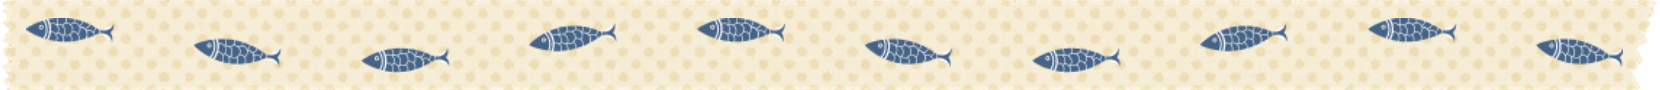

## 練習問題1

つぎのような図を表示せよ。
ただし、`draw` 関数は最大 4 回しか呼び出してはいけない。
（要するに for 文を使えということ。）

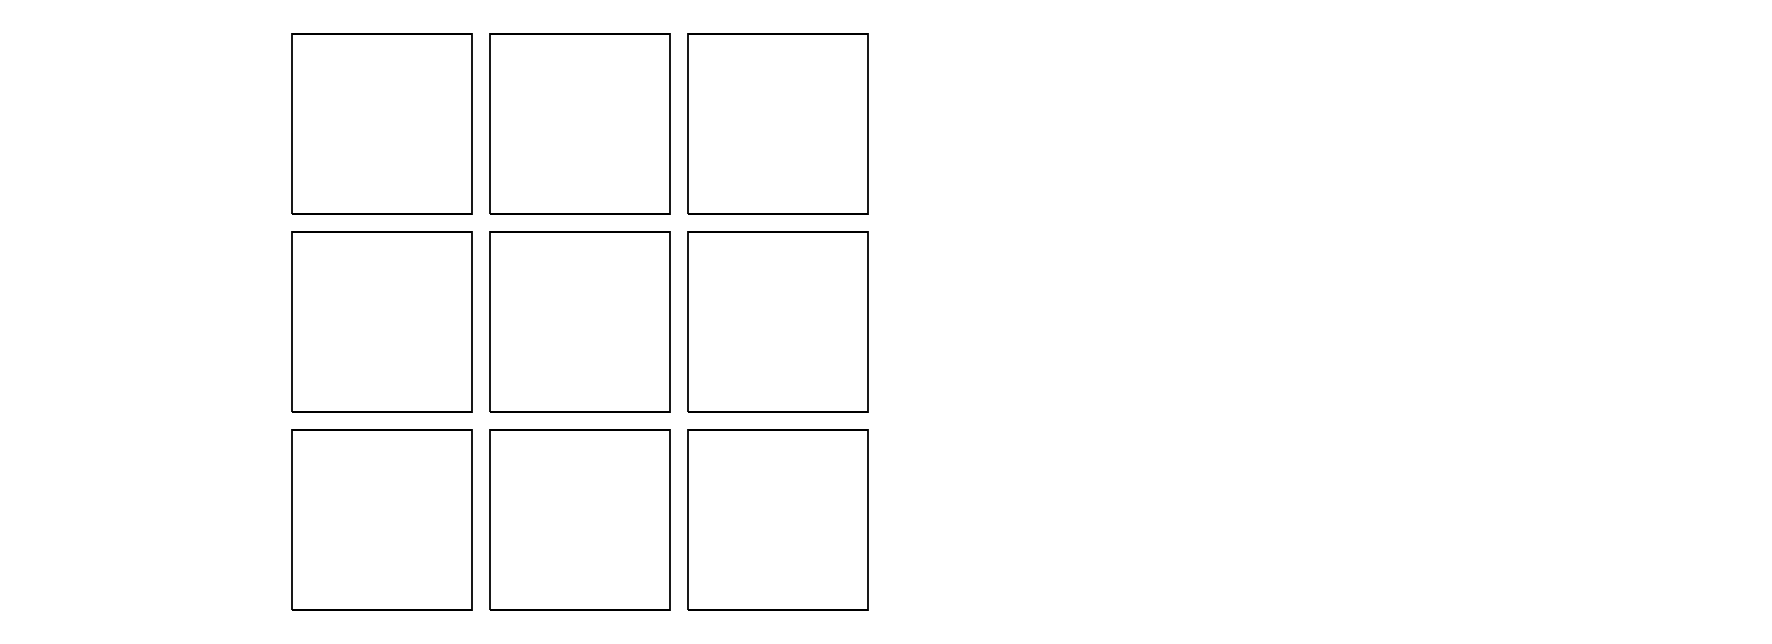

※ かならず手順1を実行して `svgplot.c` が作成された後に、以下に取り組んでください。

### (1) 描画プログラム、ソースコード

In [ ]:
%%file ex1.c
#include "svgplot.c"

int main(void)
{
    double ox, oy;
    int i, j;

    // 描画開始
    plot_start(500, 500);

    ox = 100, oy = 100;
    for (i = 0; i < 3; i++)
    {
        j = 0;
            move(ox + 110 * i,       oy + 110 * j      );
            draw(ox + 110 * i + 100, oy + 110 * j      );
            draw(ox + 110 * i + 100, oy + 110 * j + 100);
            draw(ox + 110 * i      , oy + 110 * j + 100);
            draw(ox + 110 * i      , oy + 110 * j      );
        
    }
 
    // 描画終了
    plot_end(0);

    return 0;
}

### (2) コンパイル、実行、ファイルに出力


In [ ]:
!gcc ex1.c && ./a.out

### (3) 実行結果をファイルに出力

In [ ]:
!./a.out > ex1.svg

### (4) 画像の描画



In [ ]:
from IPython.display import SVG, display_svg
display_svg(SVG('ex1.svg'))

### Q.1 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=13-0-1&cl=mc">Yes</a></button>
<button class="clicker_button"><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=13-0-1&cl=mc">No</a></button>




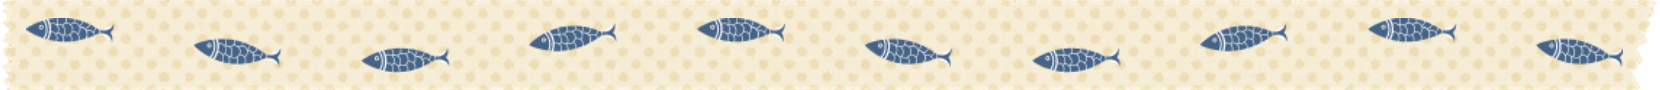

## 練習問題2

つぎのような図を表示せよ。


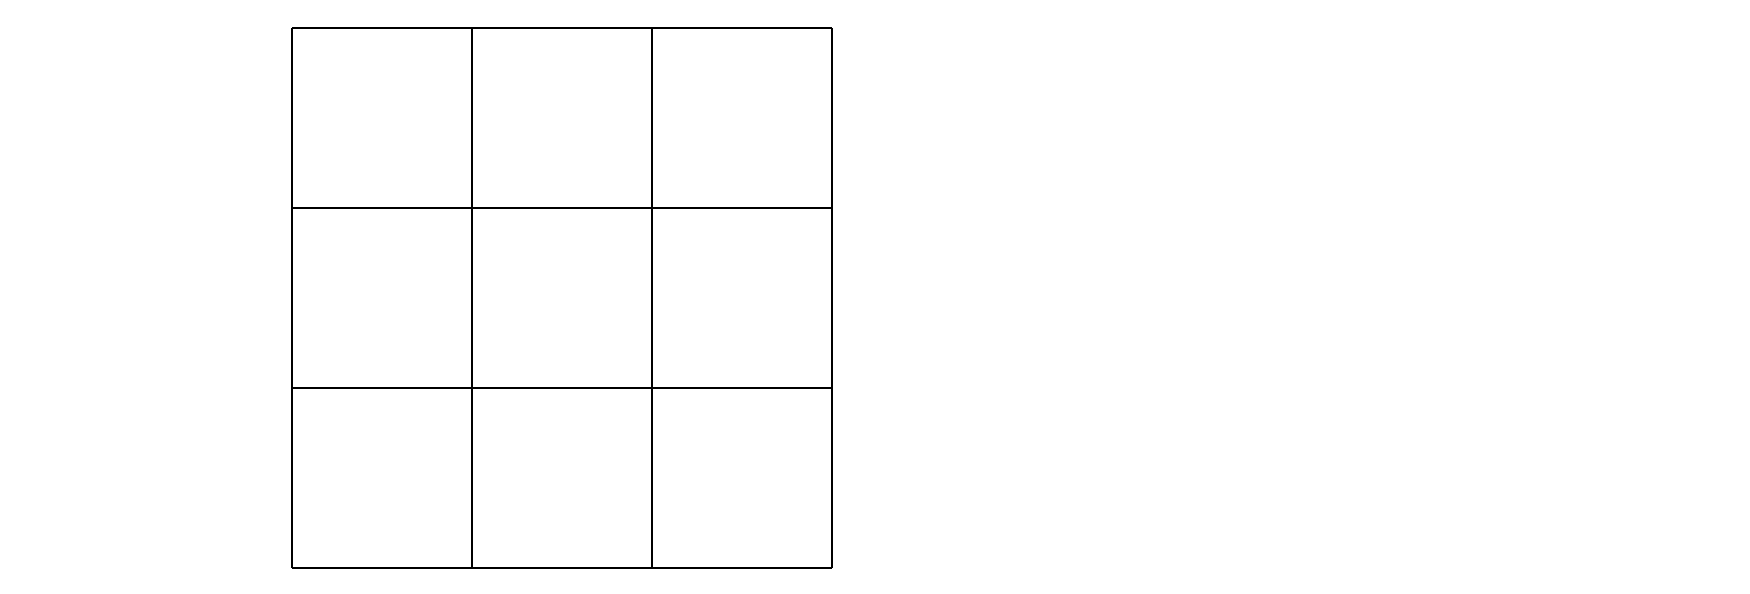

### (1) 描画プログラム、ソースコード

In [ ]:
%%file ex2.c
#include "svgplot.c"

int main(void)
{
    double ox, oy;
    int i, j;

    // 描画開始
    plot_start(500, 500);

    ox = 100, oy = 100;

    // 水平線の描画
    for (i = 0; i <= 3; i++)
    {
        move(ox      , oy + 100 * i);
        draw(ox + 300, oy + 100 * i);
    }

    // 垂直線の描画
    for (i = 0; i <= 3; i++)
    {


    }
 
    // 描画終了
    plot_end(0);

    return 0;
}

### (2) コンパイル、実行、ファイルに出力


In [ ]:
!gcc ex2.c && ./a.out

### (3) 実行結果をファイルに出力

In [ ]:
!./a.out > ex2.svg

### (4) 画像の描画



In [ ]:
from IPython.display import SVG, display_svg
display_svg(SVG('ex2.svg'))

### Q.2 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=13-0-2&cl=mc">Yes</a></button>
<button class="clicker_button"><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=13-0-2&cl=mc">No</a></button>




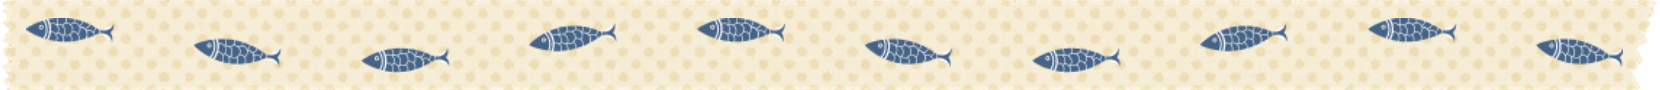

## 練習問題3

つぎのような図を表示せよ。


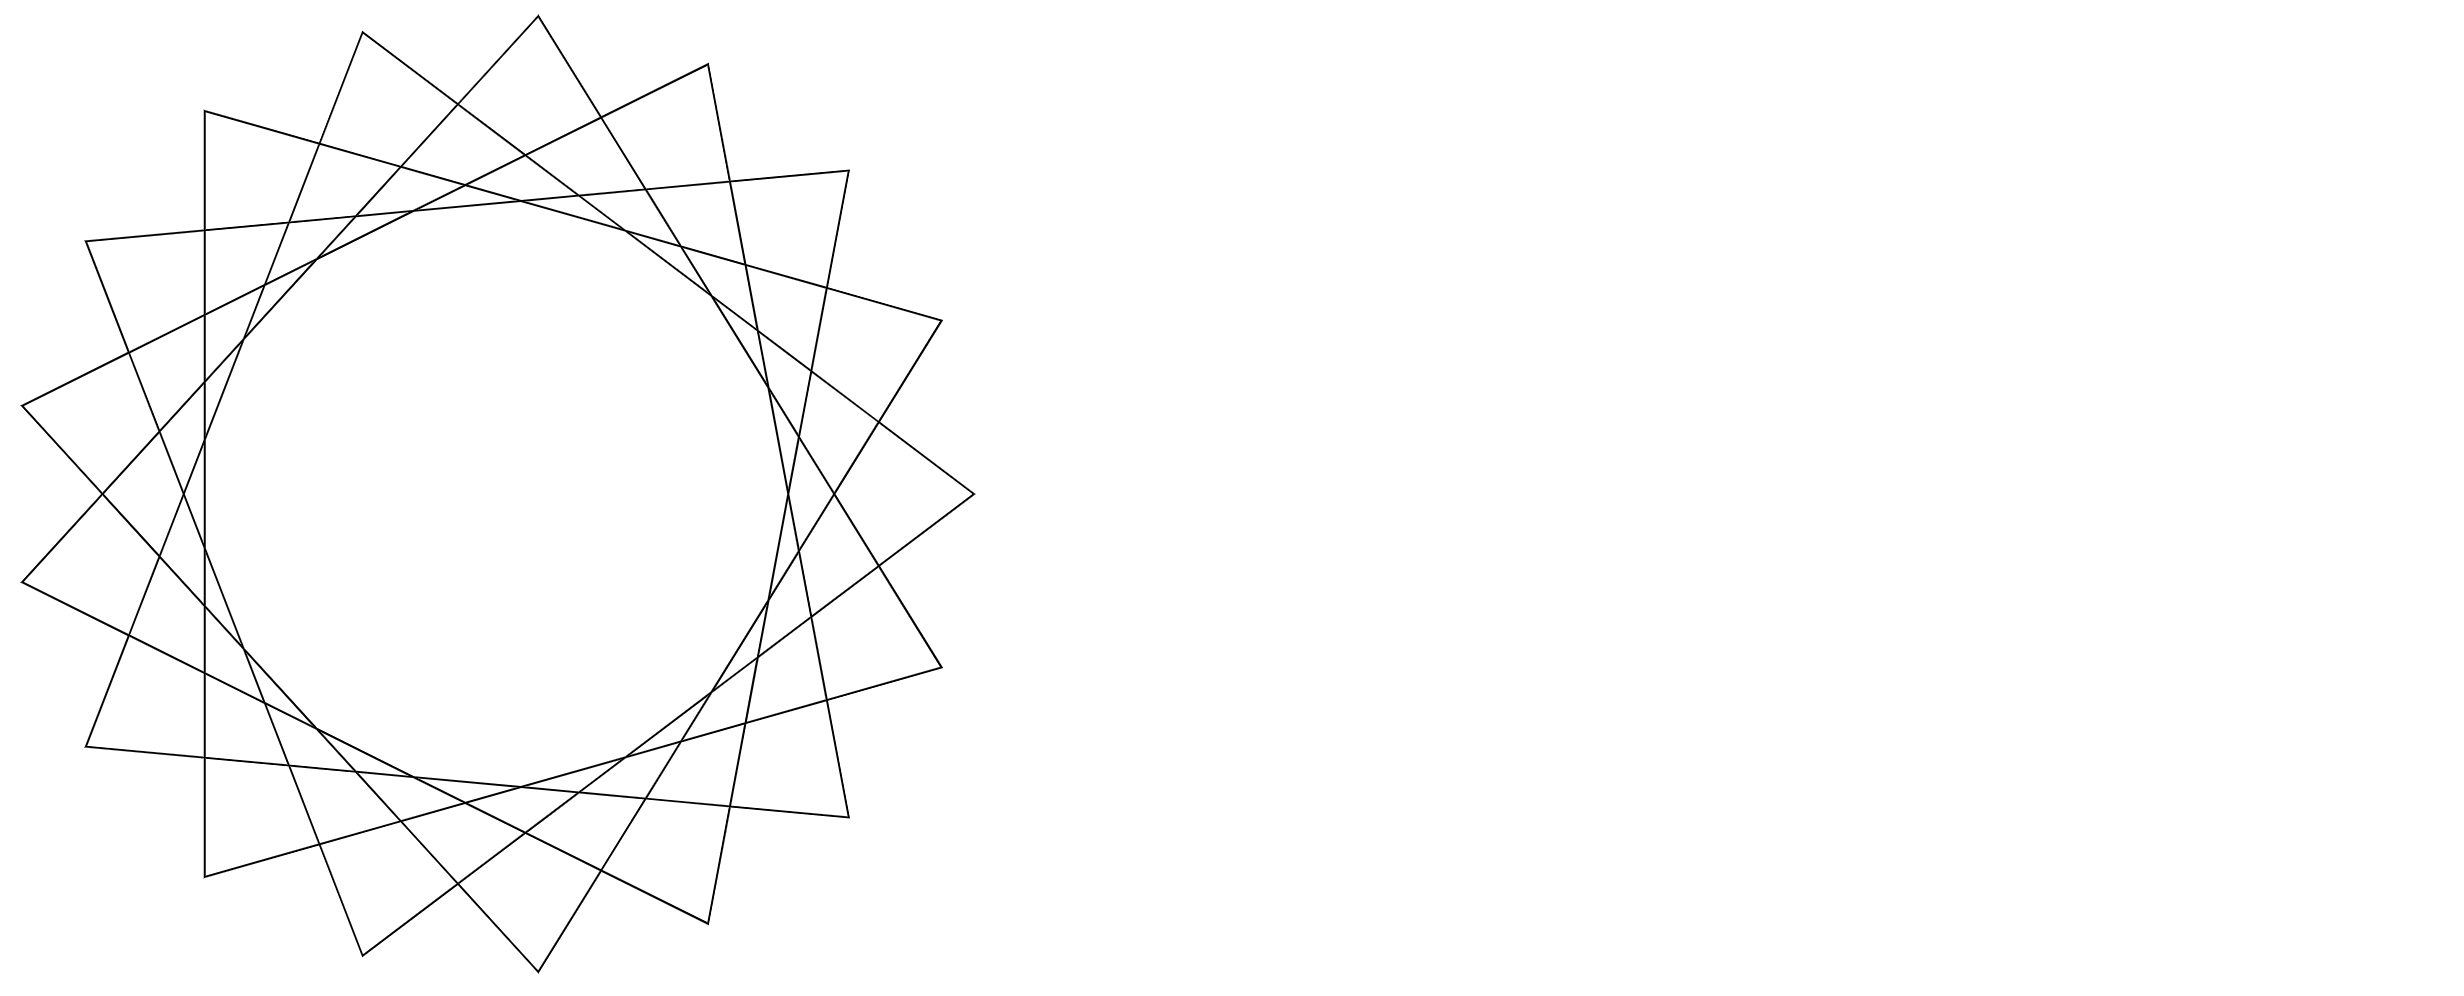

#### 前期の動画（かならず見直しておいてください）

* https://web.microsoftstream.com/video/70c5f849-1336-48b1-accd-2303730e53f6
* https://web.microsoftstream.com/video/a027d197-d599-4e96-8353-a7e0f5f12f1c


### (1) 描画プログラム、ソースコード

In [ ]:
%%file ex3.c
#include "svgplot.c"
#include <math.h>

int main(void)
{
    const double pi = 4 * atan(1.0);
    double ox, oy;
    double r;
    int n, step;
    int i;

    // 描画開始
    plot_start(500, 500);

    n = 17; step = 1;
    ox = 250, oy = 250;
    r = 240;
 
    move(r, 0);
    i = 0;
    do {
        draw(r * cos(2 * pi * i / n), r * sin(2 * pi * i / n)); // ここの意味を数学の数式に書き換えてよく考えてください。
        i = i + step;
    } while (i % n != 0);
 
    // 描画終了
    plot_end(1);

    return 0;
}

### (2) コンパイル、実行、ファイルに出力


In [ ]:
!gcc ex3.c -lm && ./a.out

### (3) 実行結果をファイルに出力

In [ ]:
!./a.out > ex3.svg

### (4) 画像の描画



In [ ]:
from IPython.display import SVG, display_svg
display_svg(SVG('ex3.svg'))

### Q.3 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=13-0-3&cl=mc">Yes</a></button>
<button class="clicker_button"><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=13-0-3&cl=mc">No</a></button>

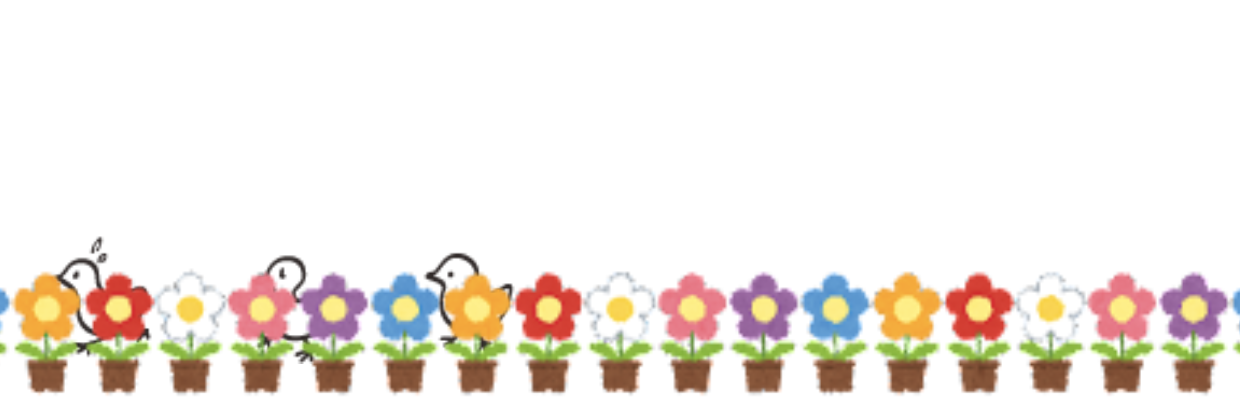